# **🧭 What is Gradient Descent?**

- Gradient Descent is an **optimization algorithm** used to **minimize** a **cost function (or loss function)**.

- In **Regression Analysis**, it’s **used to find the best-fit line** by minimizing the difference between predicted and actual values.

> ✅ Goal: Find the model parameters (like slope `m` and intercept `c` in a line) that minimize the cost function.

## **🧩 The Idea Behind It (Intuition)**

- Imagine the cost function as a **U-shaped curve** ⛰️, where the x-axis represents model parameters and the y-axis represents the cost (error).
You start at a random point and move **downhill** in the direction of the steepest descent — the **negative gradient.**

You repeat this process until you reach the **minimum** point (where slope = 0).

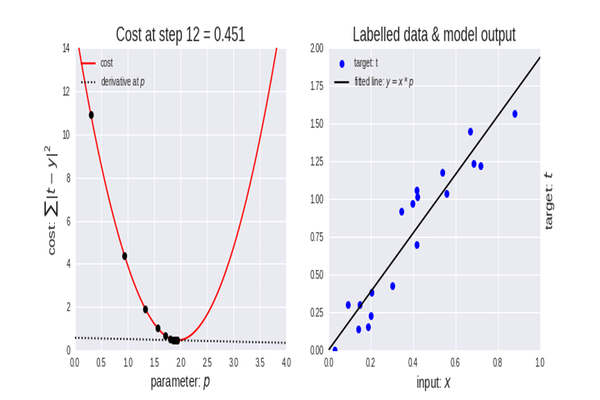


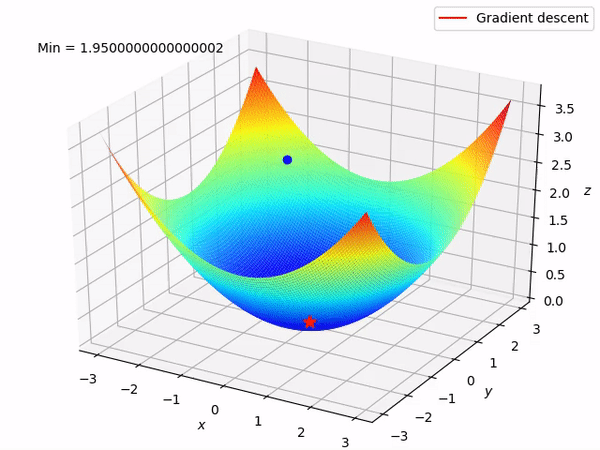




## 📐 Mathematical Formulation for Linear Regression

### 🔹For Simple Linear Regression Equation

$$
\hat{y} = mx + c
$$

where:  
- $\hat{y}$ = predicted output  
- $x$ = input feature  
- $m$ = slope (weight)  
- $c$ = intercept (bias)

---

### 🔹 Cost Function (Mean Squared Error)

$$
J(m, c) = \frac{1}{2n} \sum_{i=1}^{n} (\hat{y_i} - y_i)^2
$$

The term $\frac{1}{2n}$ is used to simplify the derivative during optimization.

---

### 🔹 Gradient (Partial Derivatives)

To minimize the cost function $J(m, c)$, we compute the gradients:

$$
\frac{\partial J}{\partial m} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y_i} - y_i)x_i
$$

$$
\frac{\partial J}{\partial c} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y_i} - y_i)
$$


---

### 🔹 Gradient Descent Update Rules

We iteratively update $m$ and $c$ as:

$$
m := m - \alpha \frac{\partial J}{\partial m}
$$

$$
c := c - \alpha \frac{\partial J}{\partial c}
$$

where:  
- $\alpha$ = learning rate (step size of descent)  
  - Large $\alpha$ → may overshoot minimum  
  - Small $\alpha$ → very slow convergence  

---

### 🔹 Final Best-Fit Line (after convergence)

$$
y = mx + c
$$

This line minimizes the **Mean Squared Error (MSE)** between predicted and actual values — hence, it’s the **best-fit line** for the given dataset.


## **🧠 Algorithm Steps (Summary)**

1. Initialize $m$ and $c$ randomly (e.g., 0).

2. Compute predictions:  
   $$
   \hat{y_i} = m x_i + c
   $$

3. Compute the cost function:  
   $$
   J(m, c) = \frac{1}{2n} \sum_{i=1}^{n} (\hat{y_i} - y_i)^2
   $$

4. Compute gradients (partial derivatives):  
   $$
   \frac{\partial J}{\partial m} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y_i} - y_i)x_i
   $$
   $$
   \frac{\partial J}{\partial c} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y_i} - y_i)
   $$

5. Update $m$ and $c$ using the gradient descent update rules:  
   $$
   m := m - \alpha \frac{\partial J}{\partial m}
   $$
   $$
   c := c - \alpha \frac{\partial J}{\partial c}
   $$

6. Repeat until convergence — i.e., until the cost function $J(m, c)$ changes very little or a set number of iterations is reached.


## **🧑‍💻 Python Code Implementation (Step-by-Step)**

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#step1: Generating dummy data to perform gradient decent on it

x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 4, 2, 5, 6])


In [33]:
#step 2: Initialize parameters

m = 0 #slope
c = 0 #intercept

alpha = 0.01 #learning rate
epsilon = 1e-6 #convergence threshold
max_epochs = 2000 #iterations
n = len(x)

Epoch value: 0
Slope (m): 0.268
Intercept (c): 0.080
Final Cost: 18.0000


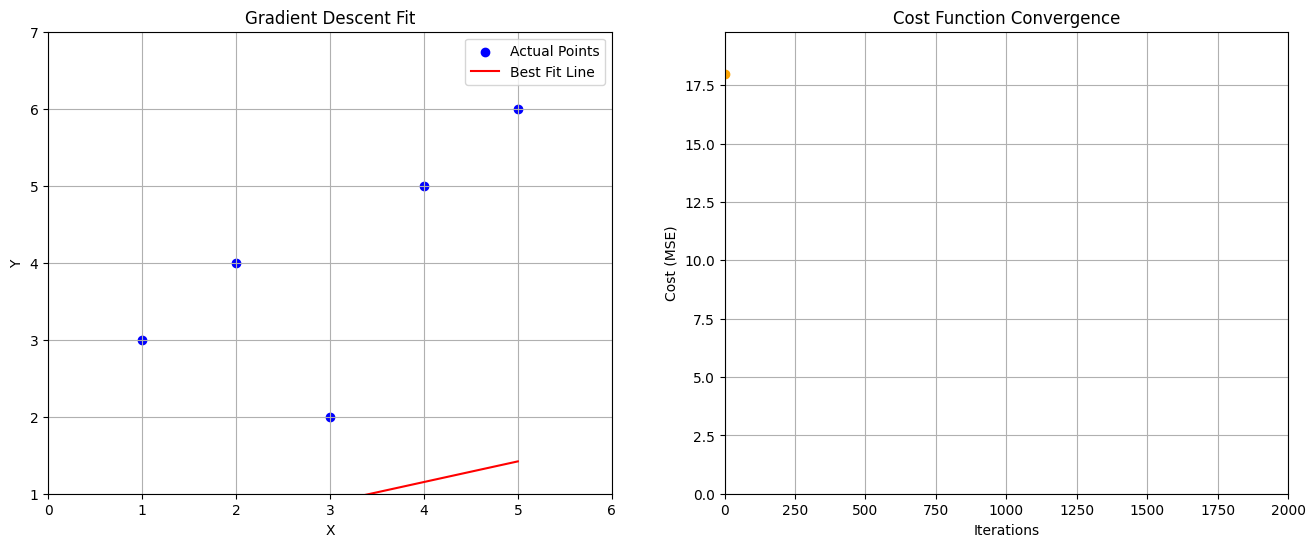

Epoch value: 200
Slope (m): 0.922
Intercept (c): 1.098
Final Cost: 1.1379


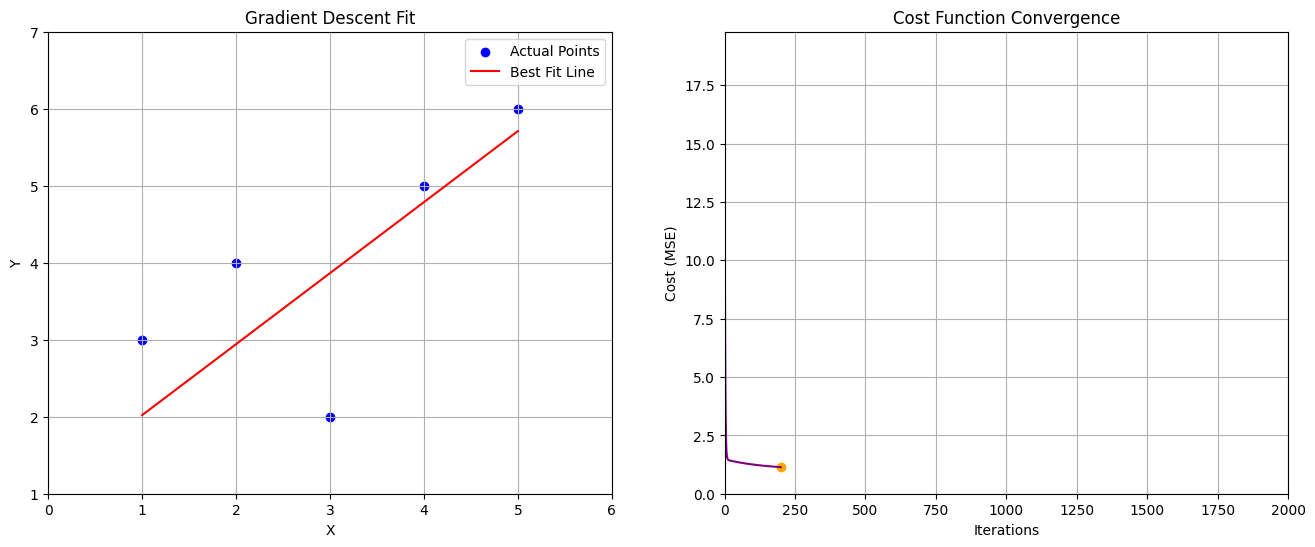

Epoch value: 400
Slope (m): 0.813
Intercept (c): 1.493
Final Cost: 1.0504


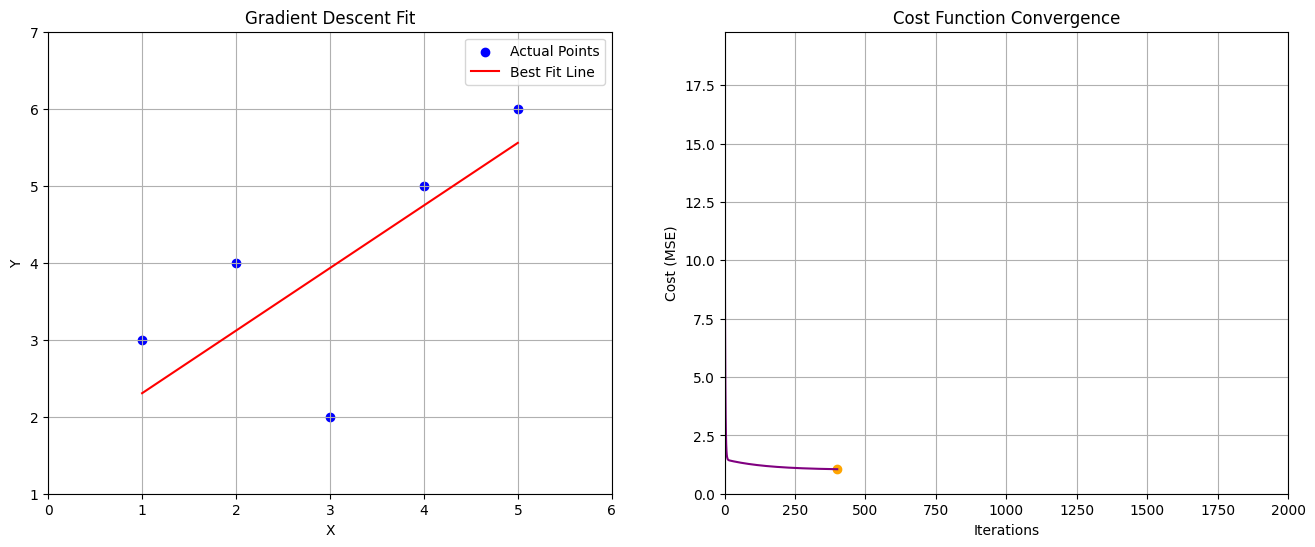

Epoch value: 600
Slope (m): 0.757
Intercept (c): 1.693
Final Cost: 1.0279


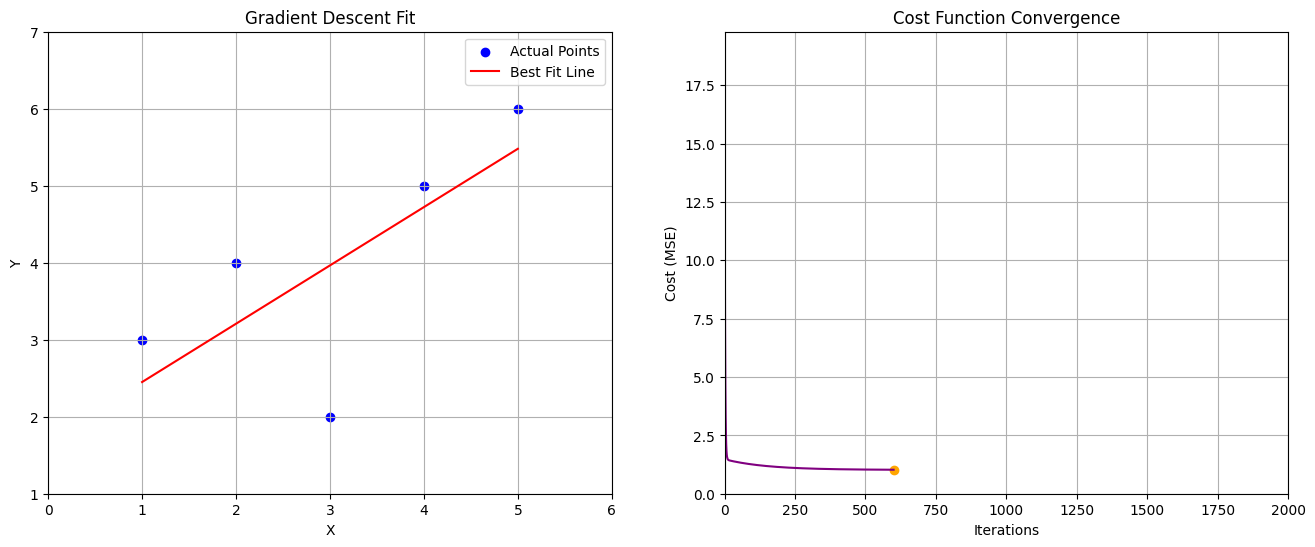

Epoch value: 800
Slope (m): 0.729
Intercept (c): 1.795
Final Cost: 1.0220


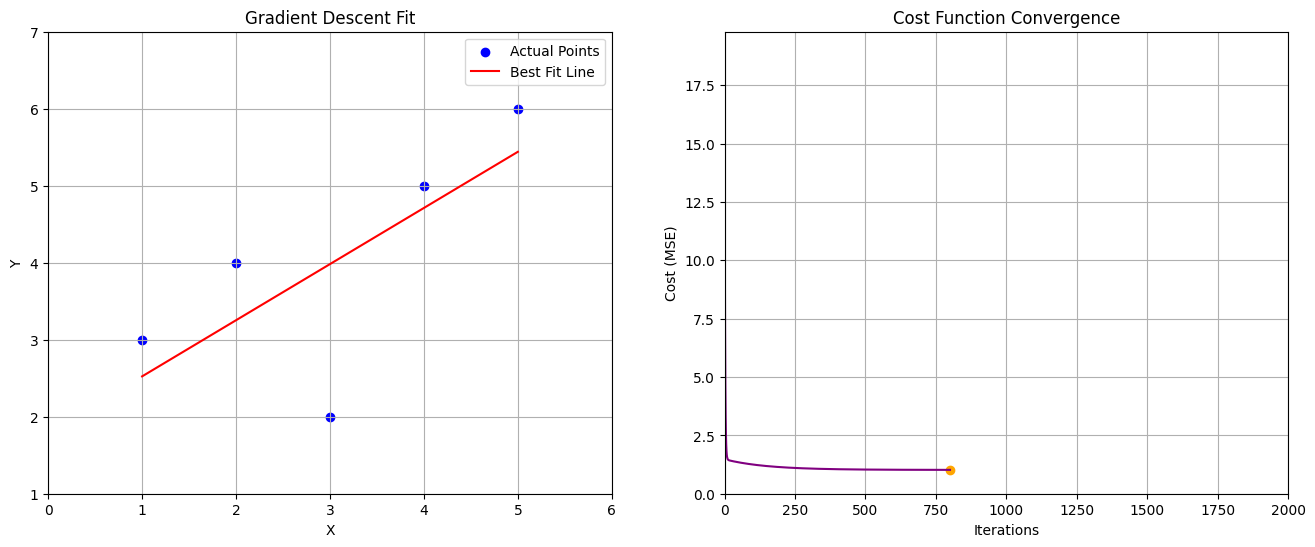

Epoch value: 1000
Slope (m): 0.715
Intercept (c): 1.847
Final Cost: 1.0205


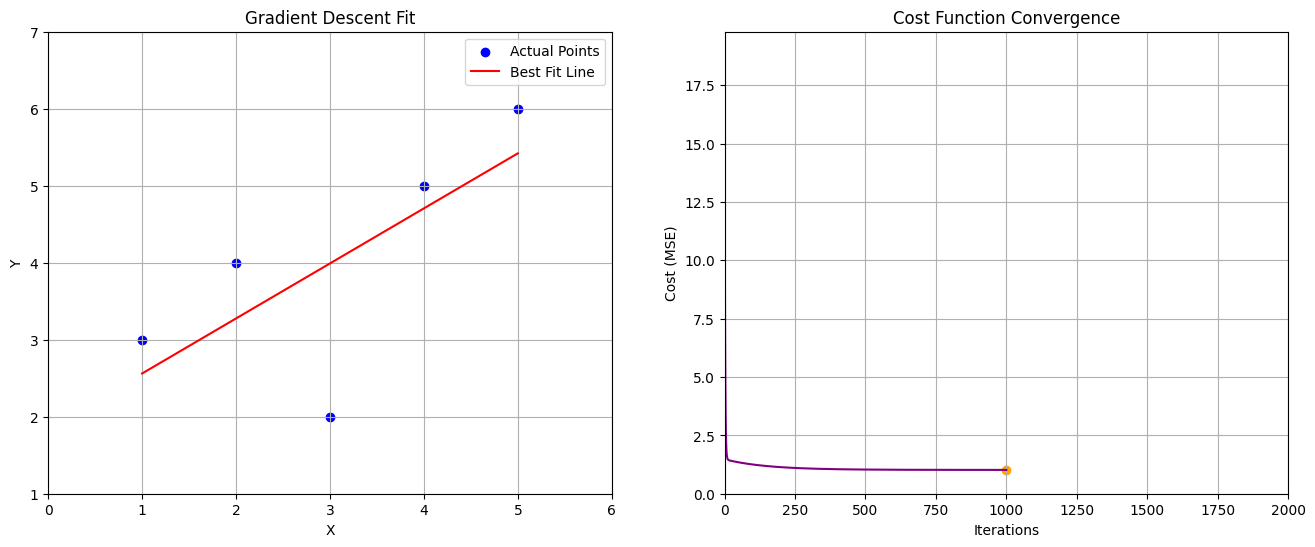

converged after 1188 iterations


In [34]:
prev_cost = 0

cost_history = []


#step 3: Gradient Descent
for epoch in range(max_epochs):
    y_pred = m*x + c #prediction
    cost = (1/n) * sum((y_pred - y) ** 2) # MSE cost function
    cost_history.append(cost)
    
    #computing gradients
    D_m = (2/n) * sum(x * (y_pred - y))
    D_c = (2/n) * sum(y_pred - y)
    
    #updating parameters
    m = m - alpha * D_m
    c = c - alpha * D_c
    
    if( epoch % 200 == 0):
        # step 4: Display results
        print(f"Epoch value: {epoch}")
        print(f"Slope (m): {m:.3f}")
        print(f"Intercept (c): {c:.3f}")
        print(f"Final Cost: {cost:.4f}")

        # step 5 : plot the best fit line
        fig, axs = plt.subplots(1, 2, figsize=(16, 6))
        
        #left plot: Data Points and Regression line
        axs[0].scatter(x, y, color = "blue", label = "Actual Points")
        axs[0].plot(x, m*x + c, color = "red", label = "Best Fit Line")
        axs[0].set_title("Gradient Descent Fit")
        axs[0].set_xlabel('X')
        axs[0].set_ylabel('Y')
        axs[0].legend()
        axs[0].grid(True)
        axs[0].set_xlim(min(x)-1, max(x)+1)
        axs[0].set_ylim(min(y)-1, max(y)+1)
        
        # Right plot: Cost vs Iterations
        axs[1].plot(range(len(cost_history)), cost_history, color = "purple")
        axs[1].scatter(epoch, cost, color='orange')
        axs[1].set_title("Cost Function Convergence")
        axs[1].set_xlabel("Iterations")
        axs[1].set_ylabel("Cost (MSE)")
        axs[1].grid(True)
        axs[1].set_xlim(0, max_epochs)
        axs[1].set_ylim(0, max(cost_history)*1.1)
        
        plt.show()
    
    if abs(cost - prev_cost) < epsilon:
        print(f"converged after {epoch} iterations")
        break
    
    prev_cost = cost

## **Explanation**

| Code Component                    | Meaning                                                                                        |
| --------------------------------- | ---------------------------------------------------------------------------------------------- |
| `epsilon = 1e-6`                  | Small threshold to decide when the cost function has stopped changing significantly.           |
| `prev_cost`                       | Stores the cost from the previous iteration.                                                   |
| `abs(cost - prev_cost) < epsilon` | Checks if improvement is smaller than epsilon — if true, training stops (model has converged). |
| `max_epochs`                      | Safety limit to prevent infinite loops if convergence fails.                                   |


In [ ]:

import imageio.v2 as imageio
import os

# Create a folder to store frames
os.makedirs("frames", exist_ok=True)

# Step 1: Dummy dataset
np.random.seed(42) #for reproducibility

X = np.linspace(0,10,100)

#creating noise for the data
noise = np.random.normal(0,3, size = X.shape)

Y = 2.5 * X + 5 + noise
# Step 2: Initialize parameters
m, c = 0, 0
alpha = 0.01
epsilon = 1e-6
max_epochs = 1200
n = len(X)
prev_cost = 0

cost_history = []
frames = []

# Step 3: Gradient Descent loop
for epoch in range(max_epochs):
    Y_pred = m * X + c
    cost = (1/n) * np.sum((Y_pred - Y)**2)
    cost_history.append(cost)

    # Compute gradients
    D_m = (2/n) * np.sum(X * (Y_pred - Y))
    D_c = (2/n) * np.sum(Y_pred - Y)

    # Update parameters
    m -= alpha * D_m
    c -= alpha * D_c

    # Save frame every 10 iterations
    if epoch % 10 == 0:
        fig, axs = plt.subplots(1, 2, figsize=(16, 6))

        # Left plot: Data points and current regression line
        axs[0].scatter(X, Y, color='blue', label='Data Points')
        axs[0].plot(X, Y_pred, color='red', label=f'Iteration {epoch}')
        axs[0].set_title('Gradient Descent Fit')
        axs[0].set_xlabel('X')
        axs[0].set_ylabel('Y')
        axs[0].legend()
        axs[0].grid(True)
        axs[0].set_xlim(min(X)-1, max(X)+1)
        axs[0].set_ylim(min(Y)-1, max(Y)+1)

        # Right plot: Cost vs Iterations
        axs[1].plot(range(len(cost_history)), cost_history, color='purple', linewidth = 3)
        axs[1].scatter(epoch, cost, color='orange',s =100)  # current iteration cost point
        axs[1].set_title('Cost Function Convergence')
        axs[1].set_xlabel('Iteration')
        axs[1].set_ylabel('Cost (MSE)')
        axs[1].grid(True)
        axs[1].set_xlim(0, max_epochs)
        axs[1].set_ylim(0.0, 50.0)

        # Save frame
        frame_path = f"frames/frame_{epoch:04d}.png"
        plt.tight_layout()
        plt.savefig(frame_path)
        plt.close(fig)
        frames.append(frame_path)

    # Stopping condition
    if abs(cost - prev_cost) < epsilon:
        print(f"Converged after {epoch} iterations.")
        break
    prev_cost = cost

# Step 4: Create GIF
with imageio.get_writer('gradient_descent_side_by_side.gif', mode='I', duration=0.1, loop = 0) as writer:
    for frame_path in frames:
        image = imageio.imread(frame_path)
        writer.append_data(image)

print("✅ Side-by-side GIF created successfully: gradient_descent_side_by_side.gif")


Converged after 1067 iterations.
✅ Side-by-side GIF created successfully: gradient_descent_side_by_side.gif


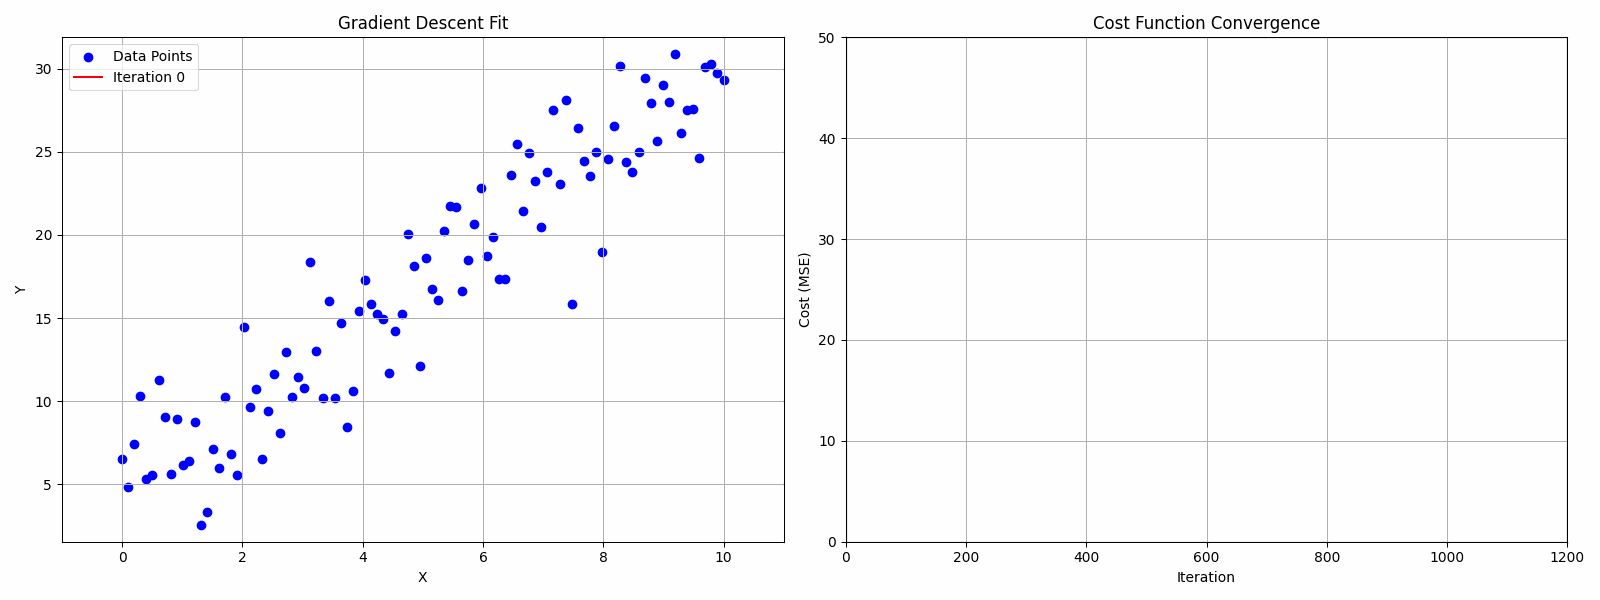